In [1]:
# пакет для работы с многомерными массивами
import numpy as np
# пакет машинной графики
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import load_wine 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score,learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve,ShuffleSplit
from sklearn.naive_bayes import GaussianNB

In [2]:
# Загружаем данные 
X,y=load_wine(return_X_y=True)
# Масштабирование данных
scaler1 = MinMaxScaler(copy = True, feature_range=(0,1))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [4]:
# Задаем классификатор, функция активации activation='tanh', число нейронов на скрытом слое hidden_layer_sizes=(100,), определяем нейросеть
mlp = MLPClassifier(hidden_layer_sizes=(100,),activation='tanh', max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=2,
                    learning_rate_init=.1)

In [5]:
#обучение
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 1.77063951
Iteration 2, loss = 4.72908520
Iteration 3, loss = 8.82222942
Iteration 4, loss = 4.06593009
Iteration 5, loss = 3.73400523
Iteration 6, loss = 1.83942540
Iteration 7, loss = 4.51964198
Iteration 8, loss = 8.41381569
Iteration 9, loss = 2.61646206
Iteration 10, loss = 7.36803433
Iteration 11, loss = 4.00347971
Iteration 12, loss = 6.36657009
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.311321
Test set score: 0.361111


In [6]:
scores = cross_val_score(mlp,X,y,cv=5)

Iteration 1, loss = 1.77827784
Iteration 2, loss = 4.49834634
Iteration 3, loss = 7.88765912
Iteration 4, loss = 4.87924201
Iteration 5, loss = 3.22955851
Iteration 6, loss = 1.62954340
Iteration 7, loss = 4.07154797
Iteration 8, loss = 5.98427946
Iteration 9, loss = 3.50495470
Iteration 10, loss = 7.54515409
Iteration 11, loss = 3.08189821
Iteration 12, loss = 4.99134003
Iteration 13, loss = 6.64960888
Iteration 14, loss = 5.12671293
Iteration 15, loss = 3.80739780
Iteration 16, loss = 4.33422323
Iteration 17, loss = 8.42199232
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.77811957
Iteration 2, loss = 4.50774811
Iteration 3, loss = 8.08168985
Iteration 4, loss = 4.74776162
Iteration 5, loss = 3.21485353
Iteration 6, loss = 1.17258761
Iteration 7, loss = 2.25260075
Iteration 8, loss = 3.42530253
Iteration 9, loss = 4.38089696
Iteration 10, loss = 6.32984260
Iteration 11, loss = 6.99113039
Iteration 12, loss = 1.11574699


In [7]:
print(scores)

[0.32432432 0.33333333 0.33333333 0.34285714 0.32352941]


In [8]:
# Делаем набор пропорций разбиения данных на обучающую и тестовую выборки
train_sizes1=np.linspace(.05, 1.0, 50)
# Задаем функцию для разбиения
cv = ShuffleSplit(n_splits=10, random_state=0)
estimator = GaussianNB()
# Используем функцию learning_curve 
# для обучения классификатора по разным наборам обучающей выборки
train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes1)
# Рассчитываем средние значения и дисперсию 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [9]:
## Строим график

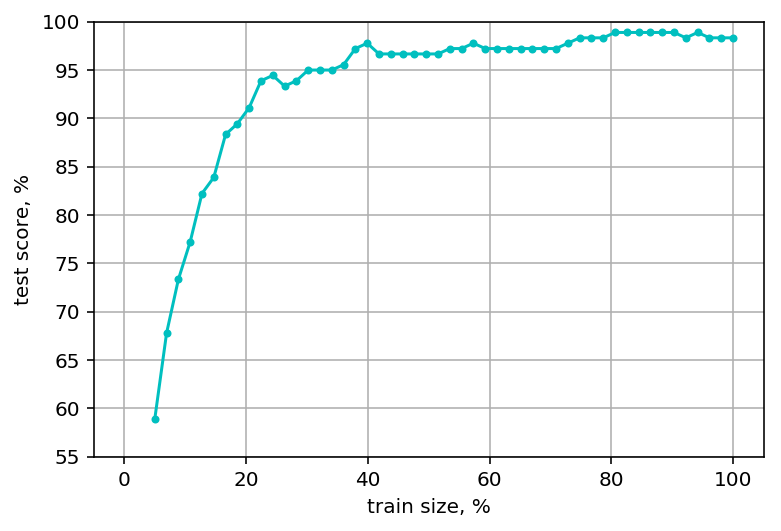

In [10]:
fig1=plt.figure(1)
plt.plot(train_sizes1*100,test_scores_mean*100,'c.-')
plt.plot(train_sizes1)
plt.xlabel('train size, %')
plt.ylabel('test score, %')
plt.ylim((55, 100))
plt.grid()